In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

In [ ]:
# Set parameters
max_features = 20000  # Top 20,000 most frequent words
maxlen = 80  # Cuts off reviews after 80 words
batch_size = 32

In [ ]:
# Load and preprocess the IMDB dataset
print("Loading data...")
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...
17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
print(f"Loaded {len(x_train)} training sequences and {len(x_test)} test sequences")

Loaded 25000 training sequences and 25000 test sequences


In [ ]:
# Pad sequences to ensure uniform input shape
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [ ]:
# Define the LSTM model
model = Sequential([
    Embedding(max_features, 128),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

In [ ]:
#  Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
print("Training model...")
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    validation_split=0.2)

Training model...
Epoch 1/5
625/625 [==============================] - 135s 209ms/step - loss: 0.4393 - accuracy: 0.7896 - val_loss: 0.3613 - val_accuracy: 0.8418
Epoch 2/5
625/625 [==============================] - 98s 156ms/step - loss: 0.2468 - accuracy: 0.9028 - val_loss: 0.3838 - val_accuracy: 0.8398
Epoch 3/5
625/625 [==============================] - 97s 155ms/step - loss: 0.1502 - accuracy: 0.9432 - val_loss: 0.5038 - val_accuracy: 0.8306
Epoch 4/5
625/625 [==============================] - 95s 153ms/step - loss: 0.0981 - accuracy: 0.9656 - val_loss: 0.5379 - val_accuracy: 0.8194
Epoch 5/5
625/625 [==============================] - 97s 156ms/step - loss: 0.0644 - accuracy: 0.9780 - val_loss: 0.6830 - val_accuracy: 0.8236


In [ ]:
# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
print(f"Test score: {score:.3f}")
print(f"Test accuracy: {acc:.3f}")

782/782 [==============================] - 19s 25ms/step - loss: 0.7149 - accuracy: 0.8118
Test score: 0.715
Test accuracy: 0.812


In [ ]:
# Plot training history
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

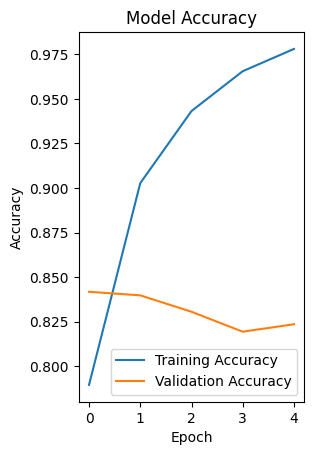

In [ ]:
# Plot 1
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

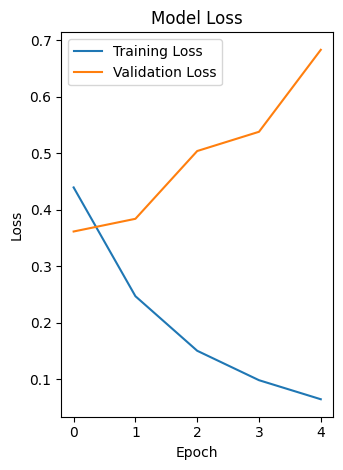

In [ ]:
# Plot 2
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Function to predict sentiment
def predict_sentiment(text):
    # Convert text to sequence of word indices
    word_index = imdb.get_word_index()
    sequence = [word_index.get(word, 0) for word in text.lower().split()]
    sequence = sequence[:maxlen]  # Truncate to maxlen
    sequence = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=maxlen)

    # Predict sentiment
    prediction = model.predict(sequence)[0][0]
    return "Positive" if prediction > 0.5 else "Negative", prediction

In [ ]:
# Example predictions
examples = [
    "This movie was excellent! The acting was great and the plot was engaging.",
    "I didn't enjoy this film at all. The story was boring and predictable.",
    "An average movie. It had some good moments but overall was forgettable."
]

In [ ]:
for example in examples:
    sentiment, score = predict_sentiment(example)
    print(f"Text: {example}")
    print(f"Predicted sentiment: {sentiment}")
    print(f"Confidence score: {score:.2f}\n")

1/1 [==============================] - 0s 417ms/step
Text: This movie was excellent! The acting was great and the plot was engaging.
Predicted sentiment: Positive
Confidence score: 0.77

1/1 [==============================] - 0s 65ms/step
Text: I didn't enjoy this film at all. The story was boring and predictable.
Predicted sentiment: Negative
Confidence score: 0.48

1/1 [==============================] - 0s 39ms/step
Text: An average movie. It had some good moments but overall was forgettable.
Predicted sentiment: Negative
Confidence score: 0.22

